# Investigação de dados

## DataSet: _Não comparecimento as consultas médicas_

Esta base de dados possui informações de 100.000 consultas médicas no Brasil e está focado na questão de buscar compreender se o paciente irá ou não comparecer a consulta. As características sobre os pacientes são descritas em cada linha.

<li>**ScheduledDay:** informa o dia em que o paciente marcou sua consulta.
<li>**Neighborhood:** indica a localização do hospital.
<li>**Scholarship:** indica se o paciente está ou não envolvido com o programa Bolsa Família.
Tenha cuidado ao interpretar a última coluna. **'No'** significa que o paciente compareceu a consulta previamente agendada. Por outro lado, **'Yes'** signifca que ele não compareceu.

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Perguntas



# <li>**1)** Quem mais falta as consultas homens ou mulheres?


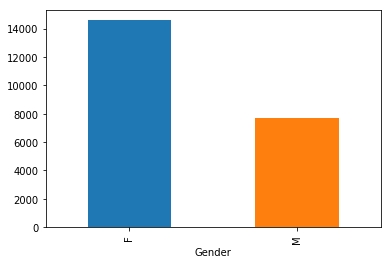

In [17]:
 paciente=df_appointments[ df_appointments['No-show'] == 'Yes']

paciente.groupby('Gender')['AppointmentID'].nunique().plot(kind='bar')

Com base nos dados fornecidos analisasse que as mulheres faltam mais do que os homens. 14594 mulheres que falraram num total de 71840, mediante a 7725 homens que faltaram num total de 38687.

# <li>**2)** Qual a proporção de pacientes que não comparecem às consultas?


Vimos na qustão anterior que o total de consultas marcadas é de 110527 dentre elas 71840 foram marcadas por mulheres e 38687 por homens o numero total de pessoas que faltaram as consultas é de 22319. Uma proporção de 22319/110527 tem como resultado que 20% das consultas foram faltadas.

# <li>**3)** Qual a distribuição da idade de pacientes que não comparecem às consultas?


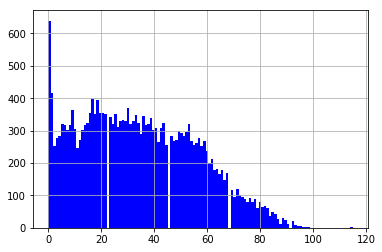

In [9]:
df_appointments.groupby(['No-show'])['Age'].get_group('Yes').hist(bins=120,alpha=1.0,color='Blue')


# <li>**4)** Há alguma relação entre doença e não comparecimento às consultas?


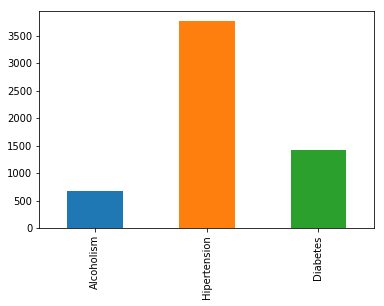

In [11]:
df_H = df_appointments.loc[df_appointments['Hipertension'] == 1, ['No-show', 'Hipertension']]
df_H_Yes = df_H.loc[df_H['No-show'] == 'Yes', ['Hipertension']].count()

df_D = df_appointments.loc[df_appointments['Diabetes'] == 1, ['No-show', 'Diabetes']]
df_D_Yes = df_D.loc[df_D['No-show'] == 'Yes', ['Diabetes']].count()

df_A = df_appointments.loc[df_appointments['Alcoholism'] == 1, ['No-show', 'Alcoholism']]
df_A_Yes = df_A.loc[df_A['No-show'] == 'Yes', ['Alcoholism']].count()

df_all_rows = pd.concat([df_A_Yes, df_H_Yes, df_D_Yes])
df_all_rows.interpolate(method='linear').plot(kind='bar')

In [ ]:
Mediante os novos dados encontrados é possível ver que às pessoas com hipertensão tendem a faltar mais consultas .

# <li>**5)** Qual a cidade com maior número de não comparecimentos?


In [10]:
df = df_appointments.loc[df_appointments['No-show'] == 'Yes', ['No-show', 'Neighbourhood']]
df_grouped = df.groupby('Neighbourhood').size().reset_index(name='Cidade com mais faltas')
df_grouped.loc[df_grouped['Cidade com mais faltas'].idxmax()]

Neighbourhood             JARDIM CAMBURI
Cidade com mais faltas              1465
Name: 38, dtype: object

# <li>**6)** Qual é o mês, dia da semana e dia do mês com maior número de não comparecimentos?


O ano de 2016 obteve o maior numero de não comparecimentos com 22319 falta. O mês e maio teve 16804 faltante sendo assim o mês com o maior numero de não comparecimentos. O dia 16 independente do mês foi o dia com maior numero de não comparecimentos, 1049. Durante a semana a terça -feira encontrasse com maior numero de faltas 5152.

# <li>**7)** Há alguma correlação entre a participação no programa social Bolsa Família e os comparecimentos?

In [18]:
df_appointments.groupby(["Scholarship", "No-show"]).size()


Scholarship  No-show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
dtype: int64

O número de pessoas que não possui o Bolsa familia e faltam as consultas tem um percentual de 20% do total e o percentual de pessoas que possuem o beneficio e faltam as consultas é de 24% do seu total, o fato da pessoa ser beneficiada com o bolsa familia pouco interfere no número de faltas da sua classe.

## Carregar os dados:


In [20]:
%matplotlib inline
import pandas as pd
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv');
df_appointments.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
